In [2]:
import time
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam, SGD, RMSprop

# Load and preprocess data

In [3]:

(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize pixel values (0–255 → 0–1)
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# One-hot encode labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


# Function to build a model

In [8]:


def build_model(hidden_layers=1, activation="relu", optimizer="adam"):
    model = Sequential()
    model.add(Flatten(input_shape=(28, 28)))

    # Add hidden layers
    for _ in range(hidden_layers):
        model.add(Dense(128, activation=activation))

    # Output layer (10 classes → softmax is best)
    model.add(Dense(10, activation="softmax"))

    model.compile(optimizer=optimizer,
                  loss="categorical_crossentropy",
                  metrics=["accuracy"])
    return model

# Run experiments

In [5]:

experiments = [
    {"activation": "relu", "optimizer": "adam", "layers": 1},
    {"activation": "sigmoid", "optimizer": "adam", "layers": 1},
    {"activation": "relu", "optimizer": "sgd", "layers": 1},
    {"activation": "relu", "optimizer": "rmsprop", "layers": 2},  # deeper
]

histories = {}
results = []

for exp in experiments:
    print(f"\n🔹 Running: {exp}")
    model = build_model(hidden_layers=exp["layers"],
                        activation=exp["activation"],
                        optimizer=exp["optimizer"])
    start = time.time()
    history = model.fit(x_train, y_train,
                        validation_split=0.2,
                        epochs=5,
                        batch_size=128,
                        verbose=0)
    end = time.time()

    # Evaluate
    test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
    training_time = end - start

    histories[str(exp)] = history
    results.append({
        "activation": exp["activation"],
        "optimizer": exp["optimizer"],
        "layers": exp["layers"],
        "test_acc": round(test_acc, 4),
        "time": round(training_time, 2)
    })



🔹 Running: {'activation': 'relu', 'optimizer': 'adam', 'layers': 1}


C:\Users\bbuser\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)



🔹 Running: {'activation': 'sigmoid', 'optimizer': 'adam', 'layers': 1}

🔹 Running: {'activation': 'relu', 'optimizer': 'sgd', 'layers': 1}

🔹 Running: {'activation': 'relu', 'optimizer': 'rmsprop', 'layers': 2}


# Show results

In [9]:
import pandas as pd
results_df = pd.DataFrame(results)
print("\n📊 Experiment Results:")
print(results_df)



📊 Experiment Results:
  activation optimizer  layers  test_acc   time
0       relu      adam       1    0.9712  54.39
1    sigmoid      adam       1    0.9493  49.34
2       relu       sgd       1    0.9046  38.97
3       relu   rmsprop       2    0.9763  54.20


# Plot accuracy curves

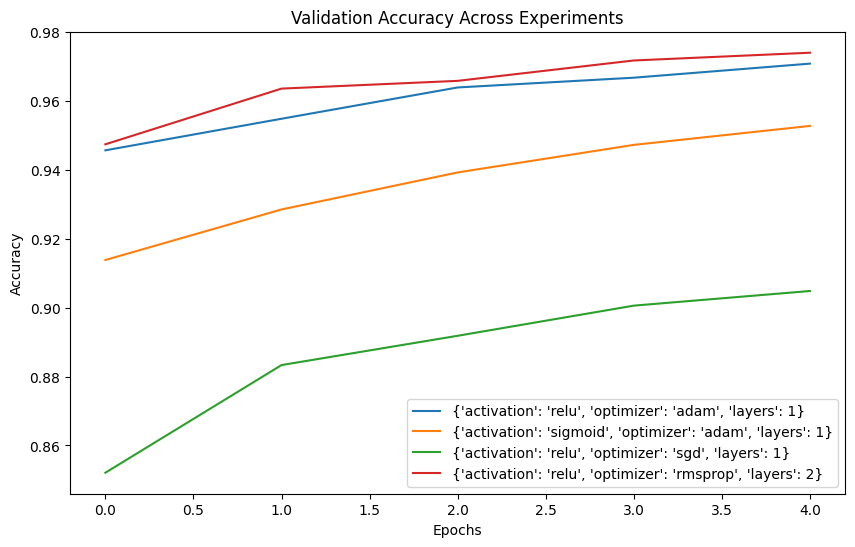

In [10]:

plt.figure(figsize=(10, 6))
for exp, history in histories.items():
    plt.plot(history.history["val_accuracy"], label=f"{exp}")
plt.title("Validation Accuracy Across Experiments")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()
